**1. Installing alpha_vantage**




In [37]:
!pip install alpha_vantage


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**2. Import necessary libraries and read the daily confirmed cases and deaths into two dataframes:**

In [38]:
import pandas as pd

confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

confirmed_df = pd.read_csv(confirmed_cases_url)
deaths_df = pd.read_csv(deaths_url)


**3. Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level:**

In [39]:
confirmed_global = confirmed_df.iloc[:, 4:].sum(axis=0)
deaths_global = deaths_df.iloc[:, 4:].sum(axis=0)

global_df = pd.DataFrame({"Confirmed": confirmed_global, "Deaths": deaths_global})
global_df.index = pd.to_datetime(global_df.index)


**4. Research stocks for each industry and store them in a dictionary:**

In [40]:
stocks = {
    "SPY": "Overall American Market",
    "XIU.TO": "Overall Canadian Market",
    "AAL": "Travel Sector",
    "VNQ": "Real Estate Sector",
    "GLD": "Precious Metals"
}


**5. Use AlphaVantage (the stock API used earlier in the course) to get the daily high and low prices for your selected stocks:**

In [41]:
from alpha_vantage.timeseries import TimeSeries

api_key = "Y97V5IF3M9KZJSRZ" 

ts = TimeSeries(api_key, output_format="pandas")

stock_data = {}

for symbol, name in stocks.items():
    data, _ = ts.get_daily_adjusted(symbol, outputsize="compact")
    data = data[["2. high", "3. low"]]
    stock_data[name] = data


In [42]:
print(stock_data)

{'Overall American Market':             2. high    3. low
date                         
2023-04-20   413.70  410.2700
2023-04-19   415.08  412.1600
2023-04-18   415.72  412.7802
2023-04-17   413.96  411.0850
2023-04-14   415.09  410.0600
...             ...       ...
2022-12-01   410.00  404.7500
2022-11-30   407.68  393.4800
2022-11-29   397.30  393.3000
2022-11-28   400.81  395.1100
2022-11-25   402.91  401.5350

[100 rows x 2 columns], 'Overall Canadian Market':             2. high  3. low
date                       
2023-04-20    31.64   31.48
2023-04-19    31.62   31.48
2023-04-18    31.67   31.56
2023-04-17    31.55   31.39
2023-04-14    31.49   31.32
...             ...     ...
2022-12-01    31.55   31.31
2022-11-30    31.29   30.81
2022-11-29    31.14   30.97
2022-11-28    31.24   30.92
2022-11-25    31.31   31.14

[100 rows x 2 columns], 'Travel Sector':             2. high   3. low
date                        
2023-04-20  13.7000  13.3100
2023-04-19  13.6800  13.1300
2023-04-

**6. Append stock data to the global_df dataframe:**

In [43]:
for name, data in stock_data.items():
    global_df = global_df.join(data.rename(columns={"2. high": f"{name} High", "3. low": f"{name} Low"}), how="inner")


In [45]:
global_df

,Confirmed,Deaths,Overall American Market High,Overall American Market Low,Overall Canadian Market High,Overall Canadian Market Low,Travel Sector High,Travel Sector Low,Real Estate Sector High,Real Estate Sector Low,Precious Metals High,Precious Metals Low
2022-11-25,641037771,6630892,402.91,401.535,31.31,31.14,14.7000,14.3500,87.0600,86.570,163.4300,162.765
2022-11-28,641977647,6633172,400.81,395.110,31.24,30.92,14.4399,13.8200,86.9600,84.510,163.0600,161.910
2022-11-29,642708342,6634772,397.30,393.300,31.14,30.97,14.1600,13.8300,86.2183,84.510,163.6299,162.600
2022-11-30,643244123,6636401,407.68,393.480,31.29,30.81,14.4450,13.9300,88.1400,85.270,164.8100,162.400
2022-12-01,643950364,6638794,410.00,404.750,31.55,31.31,14.5693,13.9324,89.3800,87.170,167.9500,166.975
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-03,675914580,6877325,404.45,399.030,31.28,30.94,16.5500,16.1400,87.1250,86.060,172.5950,170.980
2023-03-06,676082941,6878115,407.45,404.010,31.31,31.12,16.5500,16.1000,87.4100,86.385,172.3700,171.540
2023-03-07,676213378,6879038,404.67,397.625,31.20,30.71,16.6600,16.1400,86.6100,84.390,170.4700,168.520
2023-03-08,676392824,6880483,399.71,396.590,31.01,30.79,16.6000,16.2701,86.0400,84.490,169.5900,168.520


**7. Import the matplotlib library, create an appropriate graph detailing your info, and save the plot as an image:**

Confirmed cases and deaths are cumulative data, whereas stock market values are not cumulative and fluctuate daily. Comparing these directly might not provide a clear picture of their relationship.

So, I will compute the daily changes for both the confirmed cases and deaths data first, and then compare them with the daily changes in the stock market values. This would give a more accurate representation of their correlation.

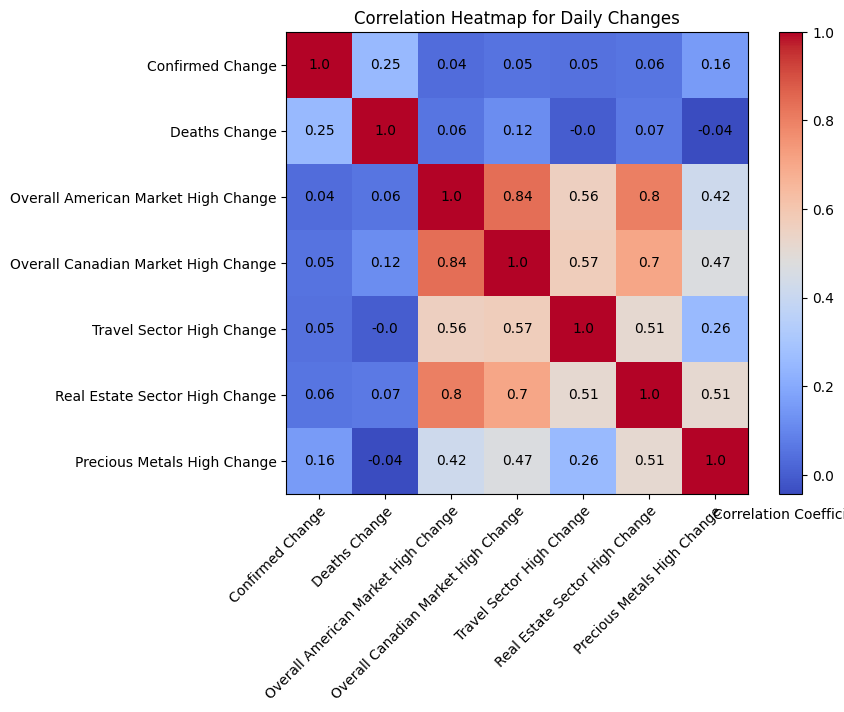

In [142]:
# Create a new DataFrame as a copy of global_df
df_copy = global_df.copy()

# Compute daily changes for confirmed cases, deaths, and stock market values
df_copy['Confirmed Change'] = df_copy['Confirmed'].diff()
df_copy['Deaths Change'] = df_copy['Deaths'].diff()

for column in cols[2:]:
    df_copy[f'{column} Change'] = df_copy[column].diff()

# Drop the first row, as it will contain NaN values due to the differencing
df_copy = df_copy.iloc[1:]

# Select a subset of columns with daily changes
change_cols = [col + ' Change' for col in cols]

# Create a new dataframe with just the selected columns
df_changes = df_copy[change_cols]

# Create the correlation matrix for the subset dataframe
corr_changes = df_changes.corr()

# Set up the figure and plot the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(corr_changes, cmap='coolwarm')
ax.set_xticks(np.arange(len(df_changes.columns)))
ax.set_yticks(np.arange(len(df_changes.columns)))
ax.set_xticklabels(df_changes.columns)
ax.set_yticklabels(df_changes.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(df_changes.columns)):
    for j in range(len(df_changes.columns)):
        text = ax.text(j, i, round(corr_changes.iloc[i, j], 2), ha="center", va="center", color="black")
# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_xlabel('Correlation Coefficient', labelpad=10)

# Set the title for the plot
ax.set_title("Correlation Heatmap for Daily Changes")

# Show the plot
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


**Reason for choosing the graph:**

The correlation heatmap was chosen as the graphical representation because it provides an easy-to-interpret visualization of the relationships between the daily changes in confirmed COVID-19 cases and the daily changes in the high prices of various stock sectors. The heatmap uses color intensity to display the strength and direction of the correlation, making it simple to identify any potential associations between the variables.

**Conclusion:**

The correlation heatmap shows weak to very weak positive correlations between the daily changes in confirmed COVID-19 cases and the daily changes in the high prices of various stock sectors. This means that there are no strong relationships between the increase in COVID-19 cases and the stock market performance for the sectors analyzed. The graph also indicates a weak positive correlation between the daily changes in confirmed cases and daily changes in COVID-19 related deaths.